### Imports


In [1]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
import plotly
import qutip as qt
from qutip import sigmaz, sigmay, sigmax, tensor, qeye
from scipy import constants as ct
import matplotlib

In [2]:
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = ['Helvetica', 'sans-serif']

In [3]:
fig_template = go.layout.Template()
fig_template.layout = {
    'template': 'simple_white+presentation',
    'autosize': True,
    'width': 600,
    'height': 500,
    # 'opacity': 0.2,
    'xaxis': {
        # 'title': 'Time (\u03BCs)',
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 1.5,
        'tickwidth': 1.5,
        'ticklen': 5,
        'showline': True,
        'showgrid': False,
    },
    'yaxis': {
        # 'title': 'Coherence',
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 1.5,
        'tickwidth': 1.5,
        'ticklen': 5,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white'
        },
    'font': {
        'family': 'Open Sans',
        'size': 20
    }
}

## Define Physical Constants

In [4]:
mu_b = ct.physical_constants['Bohr magneton in Hz/T'][0]
mu_e = ct.physical_constants['electron mag. mom. to Bohr magneton ratio'][0] * mu_b
mu_n = mu_e / ct.physical_constants['electron mag. mom. to nuclear magneton ratio'][0]

g = ct.physical_constants['electron g factor'][0]

In [5]:
plotly.__version__

'4.14.3'

In [6]:
x = np.linspace(0, 100, 101)
y = x ** 2

In [7]:
fig = go.Figure()
fig.add_scatter(x=x, y=y)
fig

In [8]:
big_sig = tensor(0.5 * sigmaz(), qeye(2)) * tensor(qeye(2), 0.5 * sigmaz()) + tensor(0.5 * sigmax(), qeye(2)) * tensor(qeye(2), 0.5 * sigmax()) + tensor(0.5 * sigmay(), qeye(2)) * tensor(qeye(2), 0.5 * sigmay())

big_sig

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]

In [9]:
big_sig = tensor(0.5*sigmax(), 0.5*sigmax()) + tensor(0.5*sigmay(), 0.5*sigmay()) + tensor(0.5*sigmaz(), 0.5*sigmaz())
big_sig

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.5   0.  ]
 [ 0.    0.5  -0.25  0.  ]
 [ 0.    0.    0.    0.25]]

In [10]:
H = -mu_e * g * tensor(sigmaz(), qeye(2)) + mu_n * g * tensor(qeye(2), sigmaz()) + big_sig


In [11]:
big_sig.eigenenergies()

array([-0.75,  0.25,  0.25,  0.25])

In [12]:
big_sig.eigenstates()

(array([-0.75,  0.25,  0.25,  0.25]),
 array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.        ]
  [ 0.70710678]
  [-0.70710678]
  [ 0.        ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.        ]
  [0.70710678]
  [0.70710678]
  [0.        ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]]], dtype=object))

In [13]:
mu_e

-14012475712.069878

In [14]:
def get_eig_vals(B_list, dim = 2):
    eigvals = np.zeros([B_list.shape[0], dim**2])
    for i, B_val in enumerate(B_list):
        H = -mu_e * g * B_val * 0.5 * tensor(sigmaz(), qeye(2)) + mu_n * g * B_val * 0.5 * tensor(qeye(2), sigmaz()) + 117e6*big_sig
        eigval = H.eigenenergies()
        eigvals[i] = eigval
    
    return eigvals

        

        
        

In [15]:
b_list = np.linspace(0, 0.040, 501)
vals = get_eig_vals(b_list)


In [16]:
fig = go.Figure()
for i in range(vals.shape[1]):
    fig.add_scatter(x=b_list*1000, y=vals[:, i]/1e9)

fig.update_layout(template=fig_template, showlegend=False, width=600, height=500)
fig.update_xaxes(title='Field (mT)')
fig.update_yaxes(title='Frequency (GHz)')

fig

In [17]:
fig.write_image('./Figs/phos-levs.pdf')

In [18]:
def get_eig_vals(B_list, dim = 2):
    eigvals = np.zeros([B_list.shape[0], 2 ** dim])
    for i, B_val in enumerate(B_list):
        H = -mu_e * g * B_val * 0.5 * sigmaz()
        eigval = H.eigenenergies()
        eigvals[i] = eigval
    
    return eigvals

b_list = np.linspace(0, 0.04, 101)
vals = get_eig_vals(b_list, dim=1)

In [19]:
fig = go.Figure()
for i in range(vals.shape[1]):
    fig.add_scatter(x=b_list*1000, y=vals[:, i]/1e9)

fig.update_layout(template=fig_template, showlegend=False, width=600, height=500)
fig.update_xaxes(title='Field (mT)')
fig.update_yaxes(title='Frequency (GHz)')

In [20]:
fig.write_image('./Figs/free-elec-levels.pdf')

In [21]:
state=qt.ket([0], dim=2) + qt.ket([1], dim=2)
plus = (1/state.norm()) * state
plus
plus_i = qt.ket([0]) + 1j * qt.ket([1], dim=2)
plus_i = (1/plus_i.norm()) * plus_i

In [22]:
qt.basis(2, 1)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

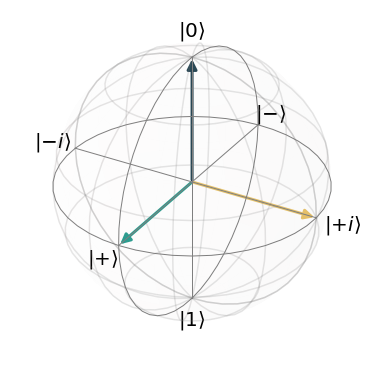

In [23]:
bloch_ex = qt.Bloch()
bloch_ex.add_states([qt.basis(2, 0), plus, plus_i])
bloch_ex.xlabel = ["$\\left|\\plus\\right>$", "$\\left|\\minus\\right>$"]
bloch_ex.ylabel = ["$\\left|\\plus i\\right>$", "$\\left|\\minus i\\right>$"]
bloch_ex.vector_color = ["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51"]
# bloch_ex.vector_color = ["#3d5a80","#98c1d9","#e0fbfc","#ee6c4d","#293241"]
bloch_ex.sphere_alpha = 0.01
bloch_ex.show()

In [24]:
state_comp = 2*qt.basis(2, 0) + plus + plus_i
state_comp = (1/state_comp.norm()) * state_comp

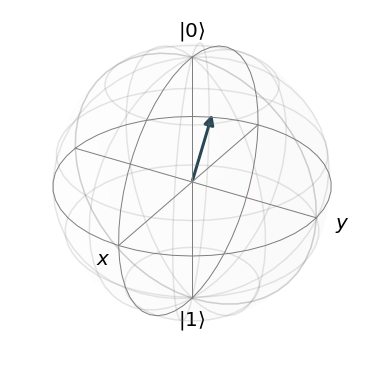

In [25]:
bloch_comp = qt.Bloch()
bloch_comp.add_states(state_comp)
# bloch_comp.xlabel = ["", ""]
# bloch_comp.ylabel = ["$\\left|\\plus i\\right>$", "$\\left|\\minus i\\right>$"]
bloch_comp.vector_color = ["#264653","#2a9d8f","#e9c46a","#f4a261","#e76f51"]
# bloch_comp.vector_color = ["#3d5a80","#98c1d9","#e0fbfc","#ee6c4d","#293241"]
bloch_comp.sphere_alpha = 0.01
bloch_comp.show()

In [26]:
bloch_ex.save('./Figs/bloch_simple.pdf', format='pdf')

In [27]:
bloch_ex.vector_color

['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51']

In [28]:
bloch_comp.save('./Figs/bloch_comp.pdf', format='pdf')

In [29]:
singlet = big_sig.eigenstates()[1][0]

In [30]:
big_sig.eigenstates()

(array([-0.75,  0.25,  0.25,  0.25]),
 array([Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.        ]
  [ 0.70710678]
  [-0.70710678]
  [ 0.        ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.        ]
  [0.70710678]
  [0.70710678]
  [0.        ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]]], dtype=object))

In [31]:
big_sig * singlet

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.        ]
 [-0.53033009]
 [ 0.53033009]
 [ 0.        ]]

In [32]:
def get_Larmor(B):
    return - g * mu_b * B

In [33]:
get_Larmor(1) / 1e9

28.024951424139754

In [34]:
B = 1
B_1 = 1e-1


In [35]:
H = g * mu_b * B * sigmaz() + g * mu_b * B_1 * np.cos(get) sigmax()

SyntaxError: invalid syntax (<ipython-input-35-4e0f1a3aeee4>, line 1)

In [118]:
omega = get_Larmor(B)
es2 = qt.eseries(0.5 * sigmax(), 1j * omega) + qt.eseries(0.5 * sigmax(), -1j * omega)
H = g * mu_b * B * sigmaz() + g * mu_b * B_1 * es2

In [115]:
omega = get_Larmor(B)
es2 = qt.eseries(0.5 * sigmax(), 1j * omega) + qt.eseries(0.5 * sigmax(), -1j * omega)
H = g * mu_b * B * sigmaz() + g * mu_b * B_1 * es2

In [43]:
omega = get_Larmor(B)
es2 = qt.eseries(0.5 * sigmax(), 1j * omega) + qt.eseries(0.5 * sigmax(), -1j * omega)
H = g * mu_b * B * sigmaz() + g * mu_b * B_1 * es2

In [44]:
es2

ESERIES object: 2 terms
Hilbert space dimensions: [[2], [2]]
Exponent #0 = 28024951424.139755j
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.  0.5]
 [0.5 0. ]]
Exponent #1 = -28024951424.139755j
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.  0.5]
 [0.5 0. ]]

In [63]:
H

ESERIES object: 3 terms
Hilbert space dimensions: [[2], [2]]
Exponent #0 = 28024951424.139755j
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.00000000e+00 -1.40124757e+09]
 [-1.40124757e+09  0.00000000e+00]]
Exponent #1 = -28024951424.139755j
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.00000000e+00 -1.40124757e+09]
 [-1.40124757e+09  0.00000000e+00]]
Exponent #2 = 0j
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-2.80249514e+10  0.00000000e+00]
 [ 0.00000000e+00  2.80249514e+10]]

In [55]:
state_0 = qt.basis(2, 0)

In [65]:
time_list = np.linspace(0, 2e-9, 101)
H_expect = qt.expect(H, state_0)
H_expect
# H_sz_vals = H_expect.value(time_list)

TypeError: Arguments must be quantum objects or eseries

In [51]:
H.value(0.0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-2.80249514e+10 -2.80249514e+09]
 [-2.80249514e+09  2.80249514e+10]]

In [121]:
time_list = np.linspace(0, 2e-9, 101)
# evo_list = qt.essolve(H, qt.basis(2, 0), tlist=time_list, e_ops=[sigmaz(), sigmax(), sigmay()], c_op_list = [sigmaz(), sigmax(), sigmay()])
H_sz_vals = H_expect.value(time_list)

AttributeError: 'eseries' object has no attribute 'isoper'

In [48]:
fig = go.Figure()
fig.add_scatter(x=time_list, y=H_sz_vals)

In [109]:
fig = go.Figure()
fig.add_scatter(x=time_list, y=evo_list.expect[0], name=r'$\sigma_z$')
fig.add_scatter(x=time_list, y=evo_list.expect[1], name=r'$\sigma_x$')
fig.add_scatter(x=time_list, y=evo_list.expect[2], name=r'$\sigma_y$')

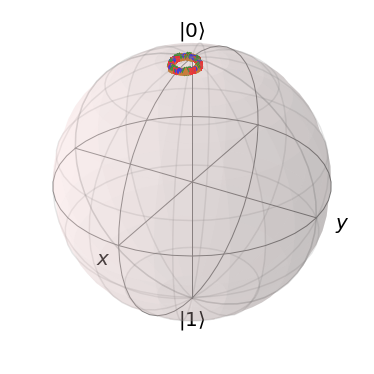

In [111]:
sphere=qt.Bloch()
sphere.add_states(evo_list.states, kind='point')
sphere.show()